# Assignment 01

#### Student: Rodolfo Lerma

Social network advertising, also social media targeting, is a group of terms that are used to describe forms of online advertising/digital marketing that focus on social networking services. One of the major benefits of this type of advertising is that advertisers can take advantage of the users' demographic information and target their ads appropriately.

Social media targeting combines current targeting options (such as geotargeting, behavioral targeting, socio-psychographic targeting, etc.), to make detailed target group identification possible. With social media targeting, advertisements are distributed to users based on information gathered from target group profiles.

Social network advertising is not necessarily the same as social media targeting. Social media targeting is a method of optimizing social media advertising by using profile data to deliver advertisements directly to individual users. Social network advertising refers to the process of matching social network users to target groups that have been specified by the advertiser. Social media advertising involves creating content on social media platforms, engaging with followers, and running social media advertisements.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Social_network_advertising)

For this assignment, we will take a look at how Social Network pick who to advertise using k-Nearest Neighbor algorithm. We will leverage the [Social Network Ads dataset](https://www.kaggle.com/rakeshrau/social-network-ads).

First, let's import the data

# Learning Objectives
- Define basic terminology of machine learning.
- Describe a typical machine learning modeling process.
- Demonstrate the ability to use K-Nearest Neighbor algorithm.
- Demonstrate the ability to tweak K-Nearest Neighbor algorithm.
- Demonstrate the ability to determine the accuracy of a model.

In [1]:
import numpy as np
import pandas as pd

SNA = pd.read_csv('./Social_Network_Ads.csv')

### Question 1: Print the top 10 rows of the dataset

In [2]:
SNA.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
SNA.shape

(400, 5)

The dataset contains 5 columns and 400 rows.

In [4]:
SNA.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

4 out of the 5 columns contain numerical variables (`int64`).

### Question 1.2: Drop the User Id column from the SNA dataframe using [drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) method

In [5]:
#Dropping the 'User ID' variable
SNA.drop(['User ID'], axis = 1, inplace = True)

In [6]:
#Summary statistics
SNA.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
#Double checking that 'User ID' was dropped
SNA.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


### Question 2.1: Within the Gender column, replace the text Male and Female with 0 and 1 respectively. You can use [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) method.

### Question 2.2: Check if successful by printing top 10 rows


In [8]:
#Replacing the 'Gender' column values for 0 and 1
SNA.replace(to_replace = ['Male','Female'], value = ['0','1'], inplace = True)
SNA.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


**As part of any machine learning problem, we need to explore the data and perform exploratory data analysis. For the next set of questions, we will be using [seaborn](https://seaborn.pydata.org/index.html) library for visualization.**

### Question 3.1: Using Seaboard [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html), create three pairwise scatter plots using Purchased column as hue for the following pairs:
1. Age & EstimatedSalary
2. Age & Gender
3. Gender & EstimatedSalary

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
#sns.scatterplot(data=SNA, x="Age", y="Gender", hue="Purchased")

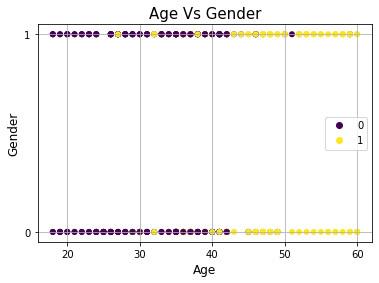

In [11]:
#create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
sc = plt.scatter(SNA['Age'], SNA['Gender'],
                 c=SNA['Purchased'], edgecolors='none')

lp = lambda i: plt.plot([],color=sc.cmap(sc.norm(i)),label=i, ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(SNA['Purchased'])]
plt.title('Age Vs Gender', fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Gender', fontsize = 12)
plt.legend(handles=handles)
plt.grid()
plt.show()

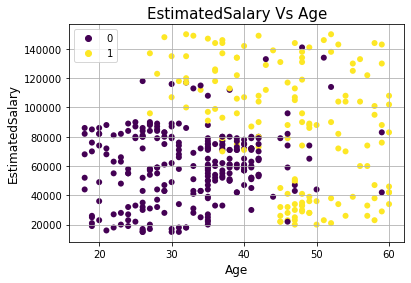

In [12]:
#create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
sc = plt.scatter(SNA['Age'], SNA['EstimatedSalary'],
                 c=SNA['Purchased'], edgecolors='none')

lp = lambda i: plt.plot([],color=sc.cmap(sc.norm(i)),label=i, ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(SNA['Purchased'])]
plt.title('EstimatedSalary Vs Age', fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('EstimatedSalary', fontsize = 12)
plt.legend(handles=handles)
plt.grid()
plt.show()

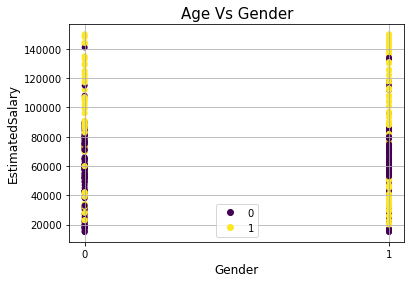

In [13]:
#create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
sc = plt.scatter(SNA['Gender'], SNA['EstimatedSalary'],
                 c=SNA['Purchased'], edgecolors='none')

lp = lambda i: plt.plot([],color=sc.cmap(sc.norm(i)),label=i, ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(SNA['Purchased'])]
plt.title('Age Vs Gender', fontsize = 15)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('EstimatedSalary', fontsize = 12)
plt.legend(handles=handles)
plt.grid()
plt.show()

### Question 3.2: Based on the above plots, which feature(s) can be best used to determine if a person will purchase an item based on Ad? 

The variables that seem to better predict if the person will purchase an item or not are:

- Age
- EstimatedSalary

`Gender` does not seem to help much in the prediction.

### Question 3.3: Use histogram plots to validate your answer. Set the Hue to be 'Purchased'

[Text(0.5, 1.0, 'Age Histogram split by "Purchased"')]

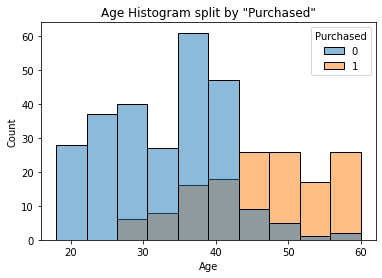

In [14]:
sns.histplot(data=SNA, x="Age", hue="Purchased").set(title='Age Histogram split by "Purchased"')

[Text(0.5, 1.0, 'Gender Histogram split by "Purchased"')]

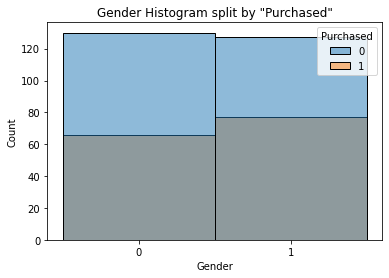

In [15]:
sns.histplot(data=SNA, x="Gender", hue="Purchased").set(title='Gender Histogram split by "Purchased"')

[Text(0.5, 1.0, 'EstimatedS Histogram split by "Purchased"')]

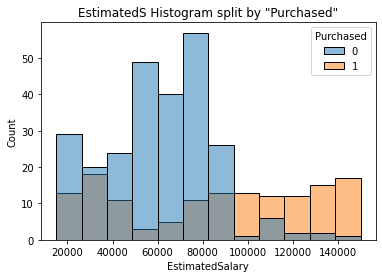

In [16]:
sns.histplot(data=SNA, x="EstimatedSalary", hue="Purchased").set(title='EstimatedS Histogram split by "Purchased"')

### Question 4: Now that we have performed data exploration, lets experiment with k-NN algorithm. But first, we need to split the data into training and testing set. To perform this task, you can use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to create a 70/30 split for training and test data respectively.

In [17]:
from sklearn.model_selection import train_test_split

#attributes = ['Gender', 'Age', 'EstimatedSalary']
variables = SNA[['Gender', 'Age', 'EstimatedSalary']]
target = SNA['Purchased']

X_train, X_test, y_train, y_test = train_test_split(variables, target, test_size=0.30, random_state=42)

### Question 5.1: Using [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), write a k-NN classifier with n=2

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate learning model (k = 3)
clf = KNeighborsClassifier(n_neighbors=2)

# Fitting the model
clf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = clf.predict(X_test)

### Using [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), evaluate and print the classifier output

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))  

Confusion Matrix
[[69  4]
 [25 22]]


In [20]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.95      0.83        73
           1       0.85      0.47      0.60        47

    accuracy                           0.76       120
   macro avg       0.79      0.71      0.71       120
weighted avg       0.78      0.76      0.74       120



In [21]:
print("Accuracy Score with K = 2")
print(accuracy_score(y_test, y_pred))

Accuracy Score with K = 2
0.7583333333333333


### Question 5.2: What happens when you increase the value of k from 2 to 10. Iterate over k from 2 to 10, build and evaluate the different KNeighborsClassifier

In [22]:
accuracy = []
k_values = []
for k in range(2,30):
    # Instantiate learning model (k = 3)
    clf_i = KNeighborsClassifier(n_neighbors=k)
    # Fitting the model
    clf_i.fit(X_train, y_train)
    # Predicting the Test set results
    y_pred_i = clf_i.predict(X_test)
    a = accuracy_score(y_test, y_pred_i)
    accuracy.append(a)
    k_values.append(k)

In [23]:
print('The maximum accuracy by the kNN model is: ')
max(accuracy)

The maximum accuracy by the kNN model is: 


0.8166666666666667

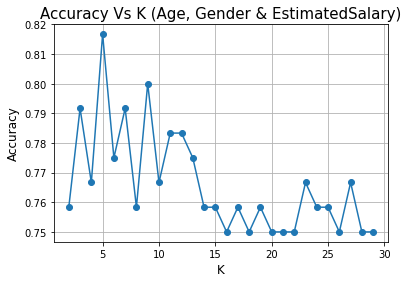

In [24]:
#Plot to see Accuracy Vs K
plt.plot(k_values, accuracy, '-o')
plt.title('Accuracy Vs K (Age, Gender & EstimatedSalary)', fontsize = 15)
plt.xlabel('K', fontsize = 12)
plt.ylabel('Accuracy', fontsize = 12)
plt.grid()
plt.show()

### Question 5.3: What happened to the accuracy of the classifier at k>9 and why?

It is possible to see that accuracy decreased with a higher K. This possibly due to overfitting. 

### Question 6.1: Now try eliminating one of the features (Gender) from the dataset

In [25]:
SNA_updated = SNA.drop(['Gender'], axis = 1)
SNA_updated.head(2)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0


In [26]:
variables_new = SNA[['Age', 'EstimatedSalary']]
#target_new = SNA['Purchased']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(variables_new, target, test_size=0.30, random_state=42)

### Question 6.2: Perform the same task from question 5.2 with the updated data

In [27]:
#To help on last question
from sklearn.metrics import precision_score, recall_score, f1_score 

In [28]:
accuracy_updated = []
k_values_updated  = []
recall = []
precision = []
f1 = []
for k in range(2,30):
    # Instantiate learning model (k = 3)
    clf_i_updated = KNeighborsClassifier(n_neighbors=k)
    # Fitting the model
    clf_i_updated.fit(X_train_new, y_train_new)
    # Predicting the Test set results
    y_pred_i_updated = clf_i_updated.predict(X_test_new)
    a_updated = accuracy_score(y_test_new, y_pred_i_updated)
    r = recall_score(y_test_new, y_pred_i_updated)
    p = precision_score(y_test_new, y_pred_i_updated)
    #f1 = f1_score(y_test_new, y_pred_i_updated, average='macro')
    #Append to list
    accuracy_updated.append(a_updated)
    k_values_updated.append(k)
    recall.append(r)
    precision.append(p)
    #f1.append(f1)

In [29]:
print('The maximum accuracy by the kNN model is: ')
max(accuracy_updated)

The maximum accuracy by the kNN model is: 


0.8166666666666667

### Question 6.3: What happened to the results? What's your conclusion? Plot accuracy vs k.

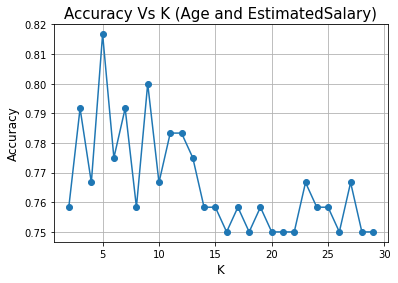

In [30]:
#Plot to see Accuracy Vs K
plt.plot(k_values_updated, accuracy_updated, '-o')
plt.title('Accuracy Vs K (Age and EstimatedSalary)', fontsize = 15)
plt.xlabel('K', fontsize = 12)
plt.ylabel('Accuracy', fontsize = 12)
plt.grid()
plt.show()

Looking at the plot it seems that in both cases we obtained the same `Accuracy` values.
It seems that the model ignored the `Gender` variable from the beginning as it did not help on the prediction of the `purchased` variable. When the noted column was removed the model basically performed the same as the other 2 columns were the ones helping on the prediction.

### Question 7: Repeat steps 6.1-6.3 with another distance metric. Comment on what happens to the results?

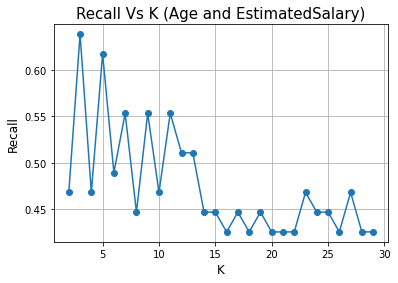

In [31]:
#Plot to see Recall Vs K
plt.plot(k_values_updated, recall, '-o')
plt.title('Recall Vs K (Age and EstimatedSalary)', fontsize = 15)
plt.xlabel('K', fontsize = 12)
plt.ylabel('Recall', fontsize = 12)
plt.grid()
plt.show()

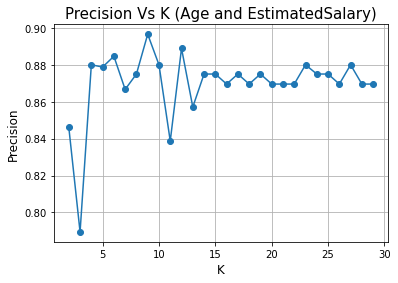

In [32]:
#Plot to see Precision Vs K
plt.plot(k_values_updated, precision, '-o')
plt.title('Precision Vs K (Age and EstimatedSalary)', fontsize = 15)
plt.xlabel('K', fontsize = 12)
plt.ylabel('Precision', fontsize = 12)
plt.grid()
plt.show()